<center>
    <img src="resource/logo_uvsq.jpg" width="40%" />
    <br />
    <h1>Machine Learning avec Scikit-Learn</h1>
    <br /><br />
    <a href="mailto:raef.mousheimish@uvsq.fr">Raef Mousheimish</a>
    <br /><br />
    Université de Versailles Saint-Quentain en Yveline
</center>

In [1]:
# Global setups
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import pandas as pd
import numpy as np
import tutorial as tt

On va utiliser le Titanic dataset pour construire une arbre de decision et faire quelque expériences.

Mais avant, je vais introduire le module __pandas__. Ce module est très important pour lire des données de sources externes comme fichier csv, et pour facilement traiter ces données dans python (faire de preprocessing par exemple).

In [2]:
# AirPassengers.csv contient le nombre de passagers par mois, de l'année 1949 à 1960

file = "dataset/AirPassengers.csv"
# Charger le fichier csv dans un pandas dataframe
# read_csv peut prendre des paramètres pour configurer le chargement de fichier
# df = pd.read_csv(file, nrows=5, header=None, na_values=['Nothing'])
df = pd.read_csv(file)
# Afficher les cinq premiers lignes 
print("Type de df:", type(df))
print(df.head())
print()

# On peut transformer le dataframe en numpy array en utilisant values
df_array = df.values
print("Type de df_array:", type(df_array))
print()

# Afficher le titre de chaque colonne dans le fichier csv
print("Colonnes:", df.columns)
print()

# Afficher les données dans une colonne spécifique
print("Colonne de Passengers:")
print(df['Passengers'].head())
pass_array = df['Passengers'].values
print("Comme un numpy array:", pass_array[:5])
print()

# Sélectionner un élément spécifique dans le DataFrame avec plusieur méthodes
print("Sélectionner un élément spécifique dans un DataFrame")
print("df.loc[0]['Passengers']:", df.loc[0]['Passengers'])
print("df.iloc[0][1]:", df.iloc[0][1])
print("df.at[0,'Passengers']:", df.at[0,'Passengers'])
print("df.iat[0,1]:", df.iat[0,1])
print("df.get_value(0,'Passengers'):", df.get_value(0,'Passengers'))
print()

# On peut utiliser ces méthodes de sélectionnement pour sélectionner une ligne ou une colonne
print("Premier colonne:", df.iloc[:,0].head())
print()
print("Première ligne:")
print(df.iloc[0])
print()

Type de df: <class 'pandas.core.frame.DataFrame'>
     Month  Passengers
0  1949-01       112.0
1  1949-02       118.0
2  1949-03       132.0
3  1949-04       129.0
4  1949-05       121.0

Type de df_array: <class 'numpy.ndarray'>

Colonnes: Index(['Month', 'Passengers'], dtype='object')

Colonne de Passengers:
0    112.0
1    118.0
2    132.0
3    129.0
4    121.0
Name: Passengers, dtype: float64
Comme un numpy array: [ 112.  118.  132.  129.  121.]

Sélectionner un élément spécifique dans un DataFrame
df.loc[0]['Passengers']: 112.0
df.iloc[0][1]: 112.0
df.at[0,'Passengers']: 112.0
df.iat[0,1]: 112.0
df.get_value(0,'Passengers'): 112.0

Premier colonne: 0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

Première ligne:
Month         1949-01
Passengers        112
Name: 0, dtype: object



In [3]:
# Ajouter une ligne au DataFrame
print("Nbr de lignes actuel:", len(df.index))
df.loc[len(df.index)] = ['1961-1', 0]
print("Nbr de lignes après l'ajout:", len(df.index))
print()

# Ajouter une colonne au DataFrame
print("Nbr de colonnes actuel:", len(df.columns))
df['nouvelle'] = 0
print("Nbr de colonnes après l'ajout:", len(df.columns))
print()

# Supprimer une colonne 
print("Nbr de colonnes actuel:", len(df.columns))
df.drop('nouvelle', axis=1, inplace=True) # ou bien: del df['nouvelle']
print("Nbr de colonnes après la suppression:", len(df.columns))
print()

# Supprimer une ligne
print("Nbr de lignes actuel:", len(df.index))
df.drop(df.index[len(df.index)-1], axis=0, inplace=True)
print("Nbr de lignes après la suppression:", len(df.index))
print()


Nbr de lignes actuel: 144
Nbr de lignes après l'ajout: 145

Nbr de colonnes actuel: 2
Nbr de colonnes après l'ajout: 3

Nbr de colonnes actuel: 3
Nbr de colonnes après la suppression: 2

Nbr de lignes actuel: 145
Nbr de lignes après la suppression: 144



DataFrame supporte beaucoup d'opérations comme:
* _replace()_ pour remplacer des Strings dans le DataFrame avec des autres Strings
* _join()_ pour joindre 2 DataFrames
* _apply()_ pour appliquer une fonction sur une ligne ou une colonne
* _applymap()_ pour appliquer une fonction sur tous les éléments d'un DataFrame
* _to_\_ _csv()_ pour sauvgarder le DataFrame dans un fichier csv
* ...

In [4]:
# Pour utiliser un DataFrame dans une boucle
head = df.head()
for index, row in head.iterrows() :
    print(row['Month'],row['Passengers'])

# Remplacer les missing values dans le DataFrame
print()
print("Missing Values dans Passengers:", pd.isnull(df['Passengers']).any())
df['Passengers'].fillna(df['Passengers'].mean(), inplace=True)
print("Missing Values dans Passengers:", pd.isnull(df['Passengers'].any()))

1949-01 112.0
1949-02 118.0
1949-03 132.0
1949-04 129.0
1949-05 121.0

Missing Values dans Passengers: True
Missing Values dans Passengers: False


### Arbre de Décision

Les arbres de décision sont très simples mais très puissants dans le domain d' apprentissage supervisé.

Ci-dessous est une figure qui présente un simple exemple pour répondre à la question si on joue au tennis ou non.

<br>
<center>
    <img src="resource/DT.png" width="40%">
<center>
<br>

Un point fort qui existe dans les arbres de décision et non dans les autres modèles est qu'on peut voir comment les décisions sont prises, i.e., basées sur quels features et quelles valeurs pour ces features

## Dataset: Titanic

Le problème qu'on va résoudre dans cet exercice est de déterminer si un passager du Titanic aurait survécu, étant donné son âge, sa classe, et son sexe. (Parsque on suppose que ces features aient influencé les résultats)

Donc on va apprendre un arbre de décision en utiliser le titanic.csv qui existe dans le dossier dataset. Dans ce fichier, on peut trouver des informations réelles sur chaque passager du Titanic, comprenant l'âge, la classe, le sexe, et s'il a survécu ou pas.

Après l'apprentissage, on va utiliser l'arbre pour faire des prédictions.

In [5]:
# Exercice: Utiliser pandas pour charger le titanic dataset et pour examiner son contenu (les colonnes, les lignes...)
file = "dataset/titanic.csv"
df = pd.read_csv(file)


In [6]:
# Exercice: Nettoyer les features qu'on va utiliser (age, class, sexe) si nécessaire
print(pd.isnull(df['pclass']).any())
print(pd.isnull(df['sex']).any())
print(pd.isnull(df['age']).any())
df['age'].fillna(df['age'].mean(), inplace=True)
print(pd.isnull(df['age'].any()))

False
False
True
False


In [7]:
# Exercice: Préparer les inputs et les classes cibles pour l'arbre. Ils doivent être de numpy array
# Les inputs contiennent l'age, classe, et sexe. et la classe cible est si le passager survécu ou pas
# Précisément, créer trois numpy array: X, y, et feature_names

X = df[['pclass','age','sex']].values
y = df['survived'].values
feature_names = np.array(df.columns[[1,4,10]])


Théoriquement, les arbres de décision acceptent des données numériques et catégorique.

Mais leurs implementations dans scikit-learn acceptent juste des données numériques.

Donc après le nettoyage des données, utilisez l'interface _transformer_ pour continuer le preprocessing, i.e., transformer les données categorique (sexe et classe) en données numériques.

In [8]:
# Exercice: Transformer les données de l'age et la classe en données numériques
# Vous pouvez utiliser différents 'transformer' dans le package sklearn.preprocessing et sklearn.feature_extraction
# Vous pouvez utiliser: LabelEncoder (le plus facile), OneHotEncoder, DictVictorizer...
from sklearn.preprocessing import LabelEncoder
vec = LabelEncoder()
class_t = vec.fit_transform(X[:,0])
X[:,0] = class_t

sex_t = vec.fit_transform(X[:,2])
X[:,2] = sex_t


In [16]:
# Exercie: Créer l'arbre de décision
# Diviser les données en deux dataset, un pour l'apprentissage et l'autre pour l'evaluation
# Vous pouver faire ça en utilisant train_test_split() du package sklearn.model_selection
# Utiliser help() pour trouver comment l'employer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn
print(sklearn.__version__)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print(dir(sklearn.tree))

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
clf.fit(X_train,y_train)


0.18.1


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

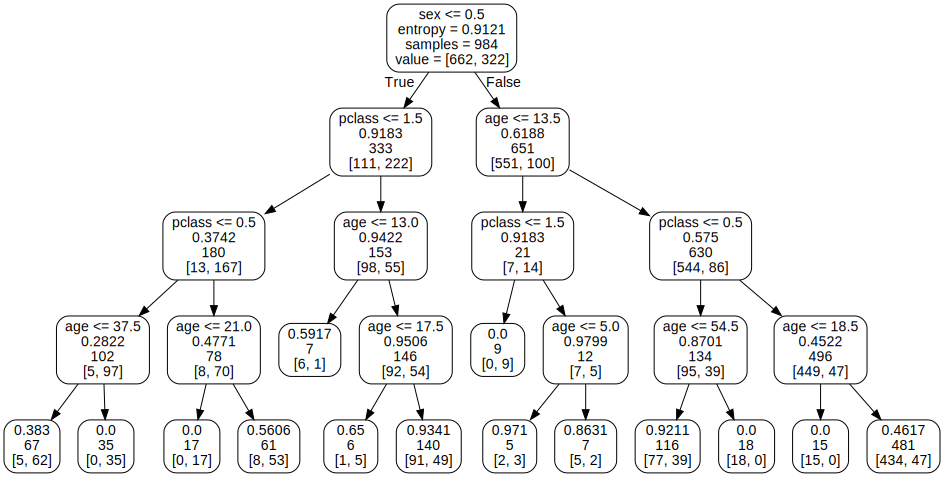

In [10]:
# Visualiser l'arbre
from IPython.display import display
from graphviz import Source # Il faut installer graphviz avec pip
from sklearn.tree import export_graphviz

display(Source(export_graphviz(clf, out_file=None, feature_names=feature_names, label="root", rounded=True)))

### Evaluation
* __Les mêmes données ne devraient pas être utilisées à la fois pour l'apprentissage et l'évaluation__ (c'est pourquoi on a divisé les données en haut) 

#### Accuracy, Precision, recall and F-measure

$$Accuracy = \frac{TP + TN}{TP + FP+ TN + FN}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

scikit-learn calcule ces métriques pour nous. Il faut utiliser le package _metrics_ dans sklearn

In [11]:
# Evaluer l'arbre avec le dataset de l'évaluation
# Utiliser accuracy_score() et classification_report() et confusion_matrix() dans metrics
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.793313069909

Classification Report:
             precision    recall  f1-score   support

          0       0.77      0.95      0.85       202
          1       0.86      0.55      0.67       127

avg / total       0.81      0.79      0.78       329



In [12]:
# Exercie: Vérifier si vous pourriez survivre si vous étiez sur le Titanic. Si vous étiez en 1er, 2ème et 3ème classe
my_X = np.array([[0,25,1], [1,25,1], [2,25,1]])
my_y = clf.predict(my_X)
print(my_y)

[0 0 0]
